# Experiments with kernel machines

In this notebook we will use simple two-dimensional data sets to illustrate the behavior of the support vector machine and the Perceptron, when used with quadratic and RBF kernels.

## 1. Basic training procedure

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

The directory containing this notebook should also contain two-dimensional data files, `data1.txt` through `data5.txt`. These files contain one data point per line, along with a label (either -1 or 1), like:
* `3 8 -1` (meaning that point `x=(3,8)` has label `y=-1`)

The next procedure, **learn_and_display_SVM**, loads one of these data sets, invokes `sklearn.SVC` to learn a classifier, and then displays the data as well as the boundary. It is invoked as follows:
* `learn_and_display_SVM(datafile, kernel_type, C_value, s_value)`

where
* `datafile` is one of `'data1.txt'` through `'data5.txt'` (or another file in the same format)
* `kernel_type` is either `'quadratic'` or `'rbf'`
* `C_value` is the setting of the soft-margin parameter `C` (default: 1.0)
* `s_value` (for the RBF kernel) is the scaling parameter `s` (default: 1.0)

In [8]:
def learn_and_display_SVM(datafile, kernel_type='rbf', C_value=1.0, s_value=1.0):
    data = np.loadtxt(datafile)
    n,d = data.shape
    # Create training set x and labels y
    x = data[:,0:2]
    y = data[:,2]
    # Now train a support vector machine and identify the support vectors
    if kernel_type == 'rbf':
        clf = SVC(kernel='rbf', C=C_value, gamma=1.0/(s_value*s_value))
    if kernel_type == 'quadratic':
        clf = SVC(kernel='poly', degree=2, C=C_value, coef0=1.0)
    clf.fit(x,y)
    sv = np.zeros(n,dtype=bool)
    sv[clf.support_] = True
    notsv = np.logical_not(sv)
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points, enlarging those that are support vectors
    plt.plot(x[(y==1)*notsv,0], x[(y==1)*notsv,1], 'ro')
    plt.plot(x[(y==1)*sv,0], x[(y==1)*sv,1], 'ro', markersize=10)
    plt.plot(x[(y==-1)*notsv,0], x[(y==-1)*notsv,1], 'k^')
    plt.plot(x[(y==-1)*sv,0], x[(y==-1)*sv,1], 'k^', markersize=10)
    # Construct a grid of points and evaluate classifier at each grid points
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = clf.decision_function(grid)
    # Quantize the values to -1, -0.5, 0, 0.5, 1 for display purposes
    for i in range(len(Z)):
        Z[i] = min(Z[i],1.0)
        Z[i] = max(Z[i],-1.0)
        if (Z[i] > 0.0) and (Z[i] < 1.0):
            Z[i] = 0.5
        if (Z[i] < 0.0) and (Z[i] > -1.0):
            Z[i] = -0.5
    # Show boundary and margin using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)
    # plt.show()

## 2. Experiments with the quadratic kernel

Let's try out SVM on some examples, starting with the quadratic kernel.

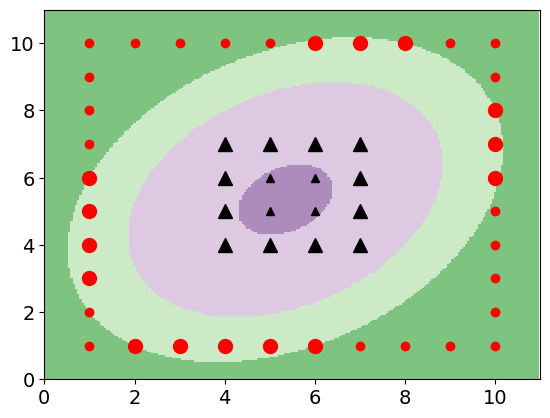

In [10]:
learn_and_display_SVM('data1.txt', 'quadratic', 1.0)

Also try `data2.txt` through `data5.txt`. Also try changing the value of `C` (the third parameter) to see how that affects the boundary and margin.

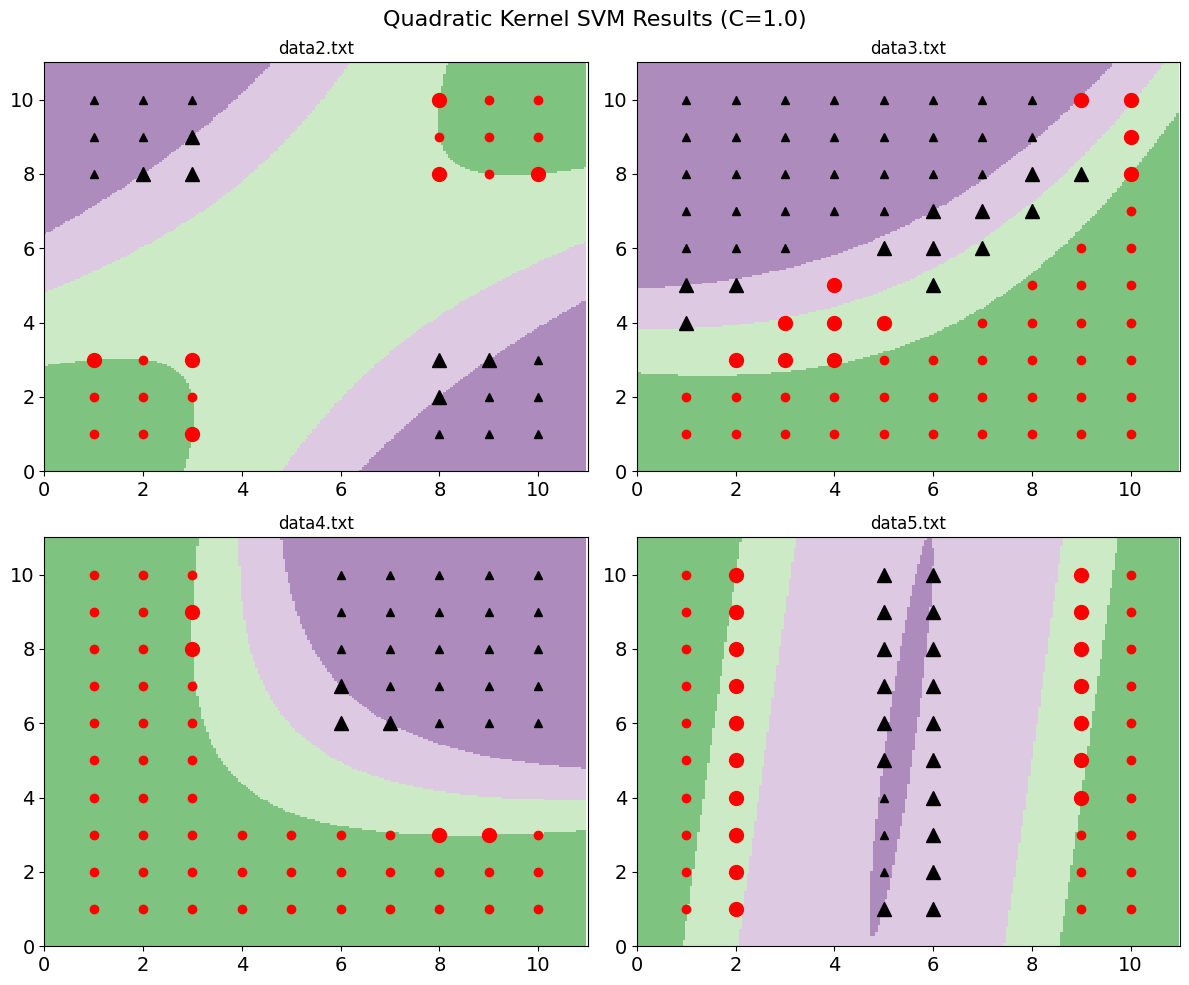

In [9]:
# Create a 2x2 grid for data2.txt through data5.txt with quadratic kernel, C=1.0
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Quadratic Kernel SVM Results (C=1.0)', fontsize=16)

data_files = ['data2.txt', 'data3.txt', 'data4.txt', 'data5.txt']

for i, data_file in enumerate(data_files):
    plt.subplot(2, 2, i+1)
    learn_and_display_SVM(data_file, 'quadratic', 1.0)
    plt.title(f'{data_file}')
    
plt.tight_layout()
plt.show()

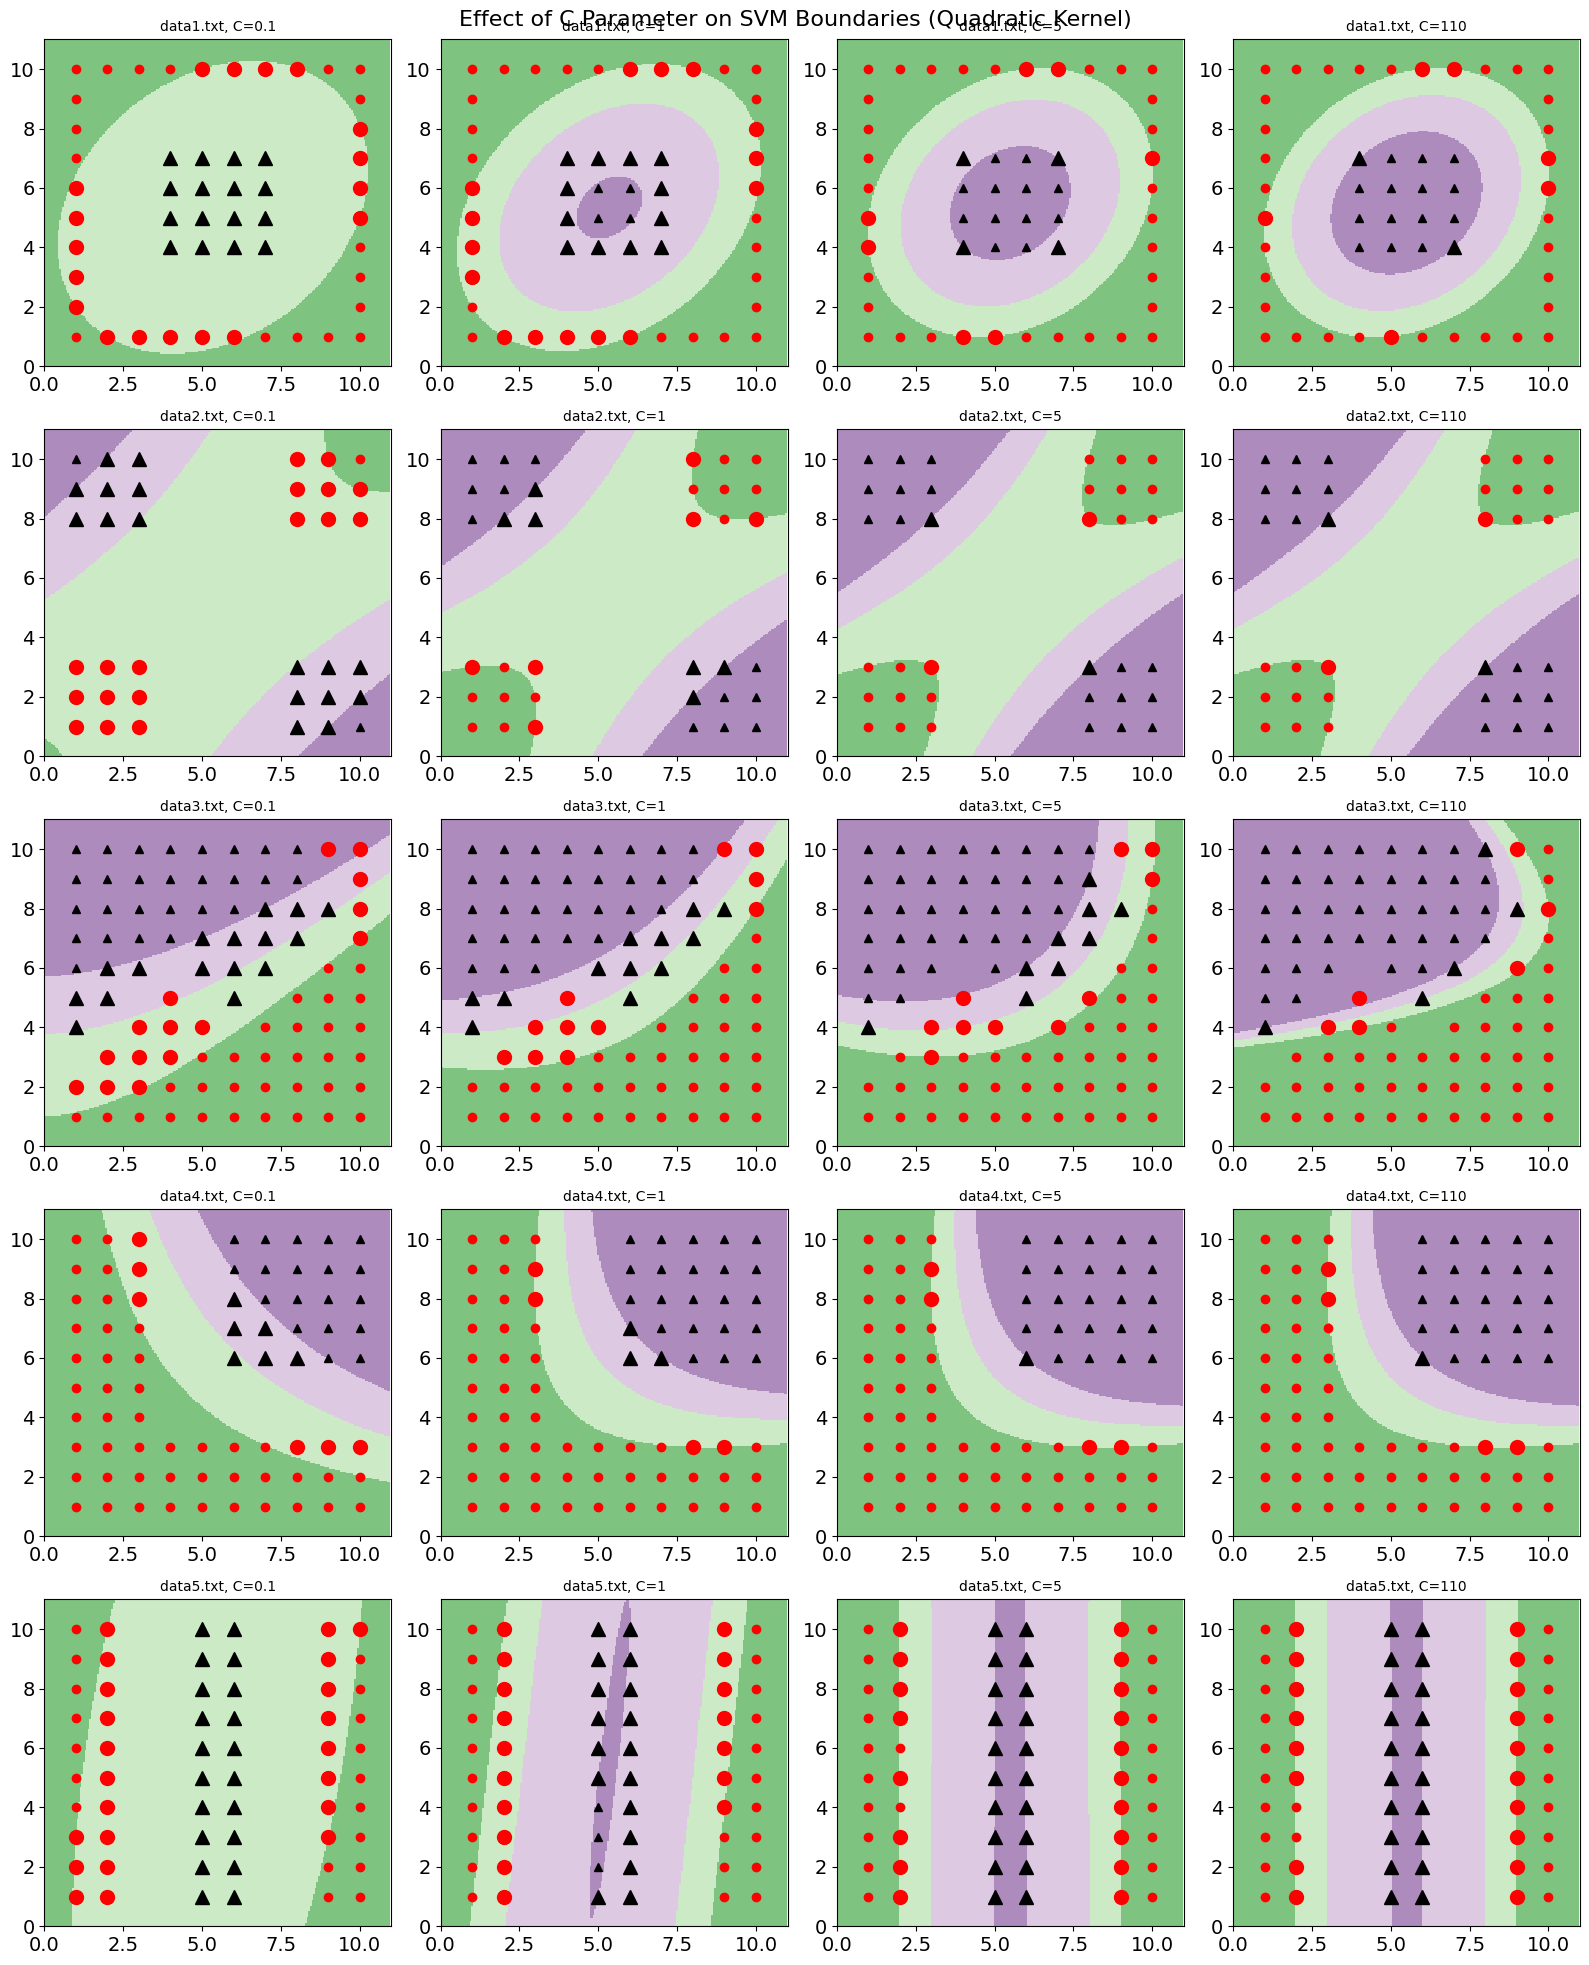

In [21]:
# Create a 5x4 grid: each row is a dataset, each column is a C value
fig, axes = plt.subplots(5, 4, figsize=(16, 20))
fig.suptitle('Effect of C Parameter on SVM Boundaries (Quadratic Kernel)', fontsize=16)

data_files = ['data1.txt', 'data2.txt', 'data3.txt', 'data4.txt', 'data5.txt']
c_values = [0.1, 1, 5, 110]

for row, data_file in enumerate(data_files):
    for col, c_val in enumerate(c_values):
        plt.subplot(5, 4, row*4 + col + 1)
        learn_and_display_SVM(data_file, 'quadratic', c_val)
        plt.title(f'{data_file}, C={c_val}', fontsize=10)
    
plt.tight_layout()
plt.show()

**Observations to make:**
- **Low C values (e.g., 0.1)**: More regularization, simpler decision boundaries, wider margins
- **High C values (e.g., 100, 1000)**: Less regularization, more complex boundaries that fit training data closely, narrower margins


## 3. Experiments with the RBF kernel

Now experiment with the RBF kernel, on the same five data sets. This time there are two parameters to play with: `C` and `sigma`.

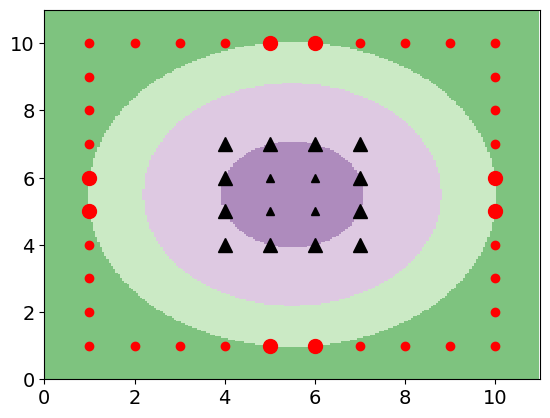

In [48]:
learn_and_display_SVM('data1.txt', 'rbf', 10.0, 10.0)

## 4. The kernel Perceptron

<font color="magenta">**For you to do:**</font> Implement the kernel Perceptron algorithm as specified in lecture. Your algorithm should allow both the quadratic and RBF kernel, and should follow roughly the same signature as the SVM routine above:
* `learn_and_display_Perceptron(datafile, kernel_type, s_value)`

Recall that the Perceptron algorithm does not always converge; you will need to explicitly check for this.

<font color="magenta">Experiment with your routine, on the same five data sets.</font>

In [41]:
def quadratic_kernel(x1, x2):
    '''Returns quadratic kernel value for 2 vectors x1 and x2
    Inputs:
        x1, x2 = 2 vecors dimension d
    Outpus:
        k = kernel value'''
    k = (1 + x1 @ x2)**2
    return k


def rbf_kernel(x1, x2, s_value):
    '''Returns Radial Basis Function kernel value for 2 vectors x1 and x2
    Inputs:
        x1, x2 = 2 vecors dimension d
    Outpus:
        k = kernel value'''
    k = np.exp(-np.linalg.norm(x1 - x2) / s_value**2)
    return k


def quadratic_kernel_matrix(x):
    '''Returns quadratic kernel matrix K of a dataset x.
    Inputs:
        x = dataset matrix of size (n x d). n datapoints, d features.
    Outputs:
        K = kernel matrix. K[i,j] = (1 + x[i] @ x[j])**2'''
    n, d = x.shape
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i,j] = quadratic_kernel(x[i], x[j])
    return K


def rbf_kernel_matrix(x, s_value):
    '''Returns Radial Basis Function (RBF) kernel matrix K of a dataset x.
    Inputs:
        x = dataset matrix of size (n x d). n datapoints, d features.
    Outputs:
        K = kernel matrix. K[i,j] = np.exp(-np.linalg.norm(x[i] - x[j]) / s_value**2)'''
    n, d = x.shape
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i,j] = rbf_kernel(x[i], x[j], s_value)
    return K


def learn_and_display_Perceptron(datafile, kernel_type='rbf', s_value=1.0):
    ###
    ### Your code
    ###
    data = np.loadtxt(datafile)
    n,d = data.shape
    
    # Create training set x and labels y
    x = data[:,0:2]
    y = data[:,2]
    
    # Choose kernel
    if kernel_type == 'quadratic':
        K = quadratic_kernel_matrix(x)
    if kernel_type == 'rbf':
        K = rbf_kernel_matrix(x,s_value)
    
    # Perceptron
    N_iter = 1000 # number of passes through dataset
    alpha = np.zeros(n)
    b = 0
    alphas = np.zeros((n, N_iter))
    bs = []
    
    for t in range(N_iter):
        for i in range(n):
            if y[i] * (np.sum(alpha * y * K[i,:] + b)) <= 0:
                alpha[i] = alpha[i] + 1
                b = b + y[i]
        alphas[:, t] = alpha
        bs.append(b)
    
    # Identify points used by classifier
    sv = np.zeros(n,dtype=bool)
    sv[alpha > 0] = True
    notsv = np.logical_not(sv)
    
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    
    # Plot the data points, enlarging those that are support vectors
    plt.plot(x[(y==1)*notsv,0], x[(y==1)*notsv,1], 'ro')
    plt.plot(x[(y==1)*sv,0], x[(y==1)*sv,1], 'ro', markersize=10)
    plt.plot(x[(y==-1)*notsv,0], x[(y==-1)*notsv,1], 'k^')
    plt.plot(x[(y==-1)*sv,0], x[(y==-1)*sv,1], 'k^', markersize=10)
    
    # Construct a grid of points and evaluate classifier at each grid points
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    
    # Predict label of each point in grid
    Z = np.zeros(grid.shape[0])
    
    if kernel_type == 'quadratic':
        K_ = np.zeros(n)
        for j in range(grid.shape[0]):
            for i in range(n):
                K_[i] = quadratic_kernel(grid[j], x[i])
            Z[j] = np.sign(np.sum(alpha * y * K_ + b))
            
    if kernel_type == 'rbf':
        K_ = np.zeros(n)
        for j in range(grid.shape[0]):
            for i in range(n):
                K_[i] = rbf_kernel(grid[j], x[i], s_value)
            Z[j] = np.sign(np.sum(alpha * y * K_ + b))
    
    # Show boundary and margin using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)
    plt.show()
    
    
    return alpha, b, np.asmatrix(alphas), bs, Z

CONVERGENCE ANALYSIS

Analyzing data1.txt:


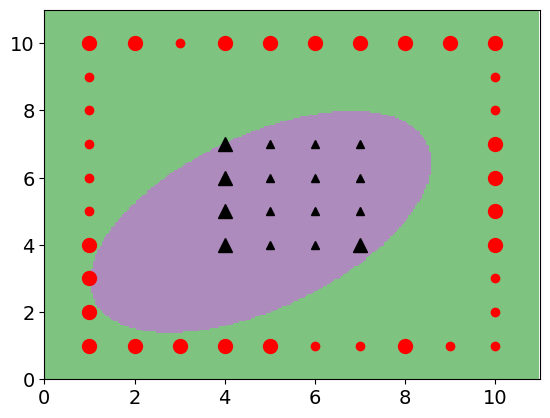

  ✅ CONVERGED at iteration 509
  📊 Final support vectors: 27

Analyzing data2.txt:


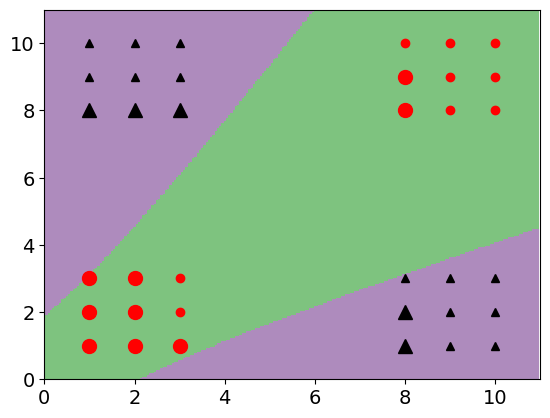

  ✅ CONVERGED at iteration 8
  📊 Final support vectors: 14

Analyzing data3.txt:


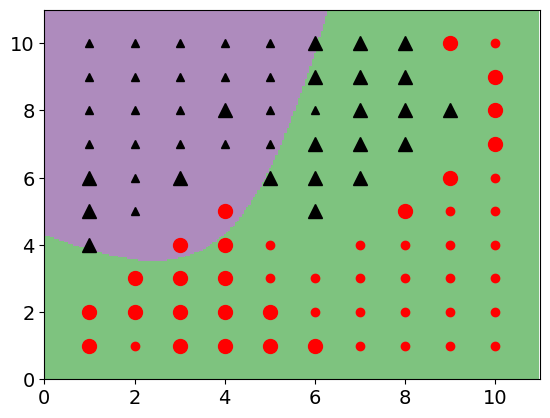

  ❌ FAILED to converge after 1000 iterations
  📊 Final mistakes: 8
  📊 Final support vectors: 43

Analyzing data4.txt:


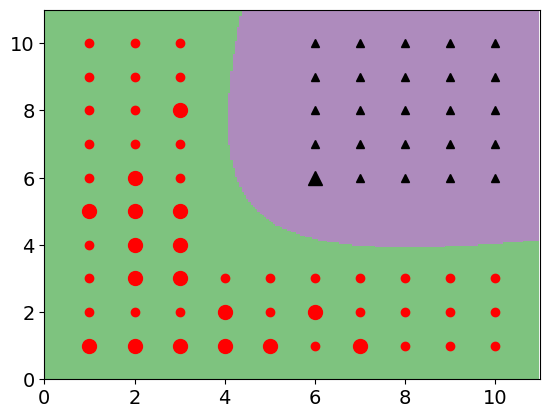

  ✅ CONVERGED at iteration 6
  📊 Final support vectors: 18

Analyzing data5.txt:


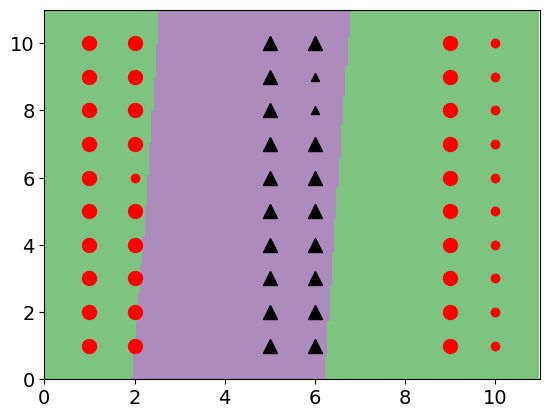

  ✅ CONVERGED at iteration 423
  📊 Final support vectors: 47


In [46]:
def analyze_perceptron_convergence(alphas, bs, threshold=1e-10):
    """
    Analyze if the Perceptron algorithm converged based on the alpha and b history.
    
    Parameters:
    - alphas: matrix of alpha values over iterations (n x N_iter)
    - bs: list of bias values over iterations
    - threshold: threshold for considering values as unchanged
    
    Returns:
    - converged: True if converged, False otherwise
    - convergence_iteration: iteration where convergence occurred (if converged)
    - final_mistakes: number of mistakes in the last iteration
    """
    n, N_iter = alphas.shape
    bs = np.array(bs)
    
    # Check when alpha and b stop changing
    for t in range(1, N_iter):
        # Check if alpha values changed from previous iteration
        alpha_diff = np.sum(np.abs(alphas[:, t] - alphas[:, t-1]))
        
        # Check if bias changed from previous iteration  
        b_diff = abs(bs[t] - bs[t-1])
        
        # If neither alpha nor b changed, we might have converged
        if alpha_diff == 0 and b_diff == 0:
            # Check a few more iterations to be sure
            converged = True
            for check_t in range(t+1, min(t+10, N_iter)):
                if (np.sum(np.abs(alphas[:, check_t] - alphas[:, t])) > 0 or 
                    abs(bs[check_t] - bs[t]) > 0):
                    converged = False
                    break
            
            if converged:
                return True, t, 0
    
    # If we reach here, algorithm didn't converge within N_iter iterations
    # Count mistakes in final iteration by checking how many alpha values increased
    if N_iter > 1:
        final_mistakes = np.sum(alphas[:, -1] - alphas[:, -2])
    else:
        final_mistakes = np.sum(alphas[:, -1])
    
    return False, N_iter, int(final_mistakes)

def test_convergence_on_all_datasets():
    """Test convergence on all datasets with quadratic kernel"""
    print("CONVERGENCE ANALYSIS")
    print("=" * 50)
    
    kernel_type = 'quadratic'
    
    for file in ['data1.txt', 'data2.txt', 'data3.txt', 'data4.txt', 'data5.txt']:
        print(f"\nAnalyzing {file}:")
        
        # Run the perceptron (without showing plots)
        plt.ioff()  # Turn off interactive plotting
        alpha, b, alphas, bs, Z = learn_and_display_Perceptron(file, 
                                                             kernel_type=kernel_type, 
                                                             s_value=1.0)
        plt.close()  # Close the plot
        plt.ion()   # Turn interactive plotting back on
        
        # Analyze convergence
        converged, conv_iter, final_mistakes = analyze_perceptron_convergence(alphas, bs)
        
        if converged:
            print(f"  ✅ CONVERGED at iteration {conv_iter}")
            print(f"  📊 Final support vectors: {np.sum(alpha > 0)}")
        else:
            print(f"  ❌ FAILED to converge after {conv_iter} iterations")
            print(f"  📊 Final mistakes: {final_mistakes}")
            print(f"  📊 Final support vectors: {np.sum(alpha > 0)}")

# Run the convergence test
test_convergence_on_all_datasets()

CONVERGENCE ANALYSIS - RBF KERNEL

Analyzing data1.txt with RBF kernel:


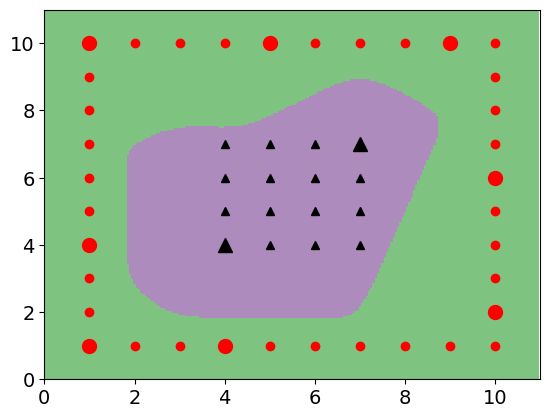

  ✅ CONVERGED at iteration 8
  📊 Final support vectors: 10

Analyzing data2.txt with RBF kernel:


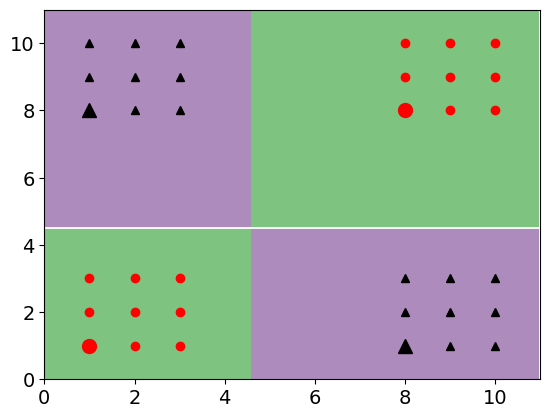

  ✅ CONVERGED at iteration 2
  📊 Final support vectors: 4

Analyzing data3.txt with RBF kernel:


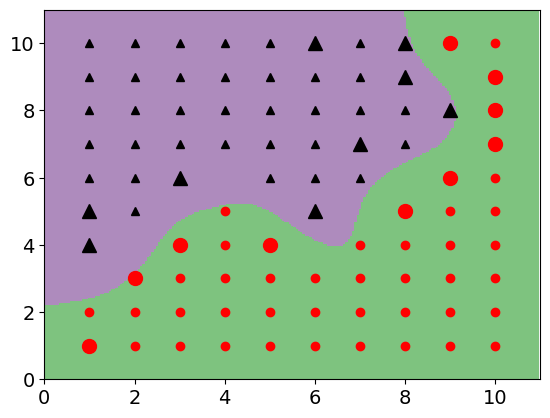

  ✅ CONVERGED at iteration 5
  📊 Final support vectors: 19

Analyzing data4.txt with RBF kernel:


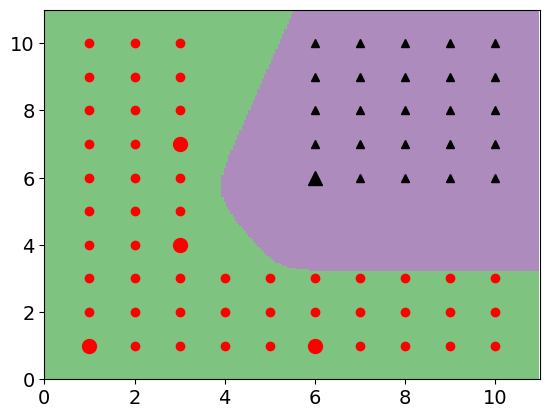

  ✅ CONVERGED at iteration 4
  📊 Final support vectors: 5

Analyzing data5.txt with RBF kernel:


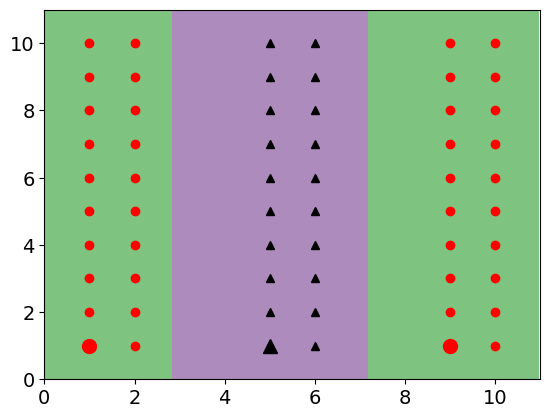

  ✅ CONVERGED at iteration 2
  📊 Final support vectors: 3

RBF KERNEL SUMMARY:
RBF kernels typically converge much faster than quadratic kernels
due to their universal approximation properties and smoother decision boundaries.


In [47]:
# Test convergence on RBF kernel experiments
print("CONVERGENCE ANALYSIS - RBF KERNEL")
print("=" * 50)

kernel_type = 'rbf'
s_value = 1

for file in ['data1.txt', 'data2.txt', 'data3.txt', 'data4.txt', 'data5.txt']:
    print(f"\nAnalyzing {file} with RBF kernel:")
    
    # Run the perceptron (without showing plots)
    plt.ioff()  # Turn off interactive plotting
    alpha, b, alphas, bs, Z = learn_and_display_Perceptron(file, 
                                                         kernel_type=kernel_type, 
                                                         s_value=s_value)
    plt.close()  # Close the plot
    plt.ion()   # Turn interactive plotting back on
    
    # Analyze convergence
    converged, conv_iter, final_mistakes = analyze_perceptron_convergence(alphas, bs)
    
    if converged:
        print(f"  ✅ CONVERGED at iteration {conv_iter}")
        print(f"  📊 Final support vectors: {np.sum(alpha > 0)}")
    else:
        print(f"  ❌ FAILED to converge after {conv_iter} iterations")
        print(f"  📊 Final mistakes: {final_mistakes}")
        print(f"  📊 Final support vectors: {np.sum(alpha > 0)}")

print(f"\n{'='*60}")
print("RBF KERNEL SUMMARY:")
print("RBF kernels typically converge much faster than quadratic kernels")
print("due to their universal approximation properties and smoother decision boundaries.")